In [1]:
import networkx as nx

1

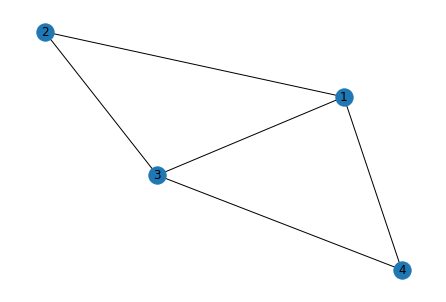

In [2]:
# 가중치가 없는 네트워크
g = nx.Graph()
g.add_nodes_from([1,2,3,4])
g.add_edges_from([(1,2),(2,3),(1,3),(1,4)])
g.add_edge(3,4)
nx.draw(g, with_labels = True)
nx.radius(g)

In [3]:
nx.has_path(g,3,4)

True

In [4]:
list(nx.all_simple_paths(g,3,4)) # 노드 3에서 노드 4로 가는 모든 경로

[[3, 2, 1, 4], [3, 1, 4], [3, 4]]

In [5]:
nx.shortest_path(g,3,4) # 노드 3에서 노드 4로 가는 최단 경로

[3, 4]

In [6]:
nx.shortest_path_length(g,3,4) # 노드 3에서 노드 4로 가는 최단 경로 길이

1

In [7]:
nx.shortest_path(g) # 모든 경로 확인

{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4]},
 2: {2: [2], 1: [2, 1], 3: [2, 3], 4: [2, 1, 4]},
 3: {3: [3], 2: [3, 2], 1: [3, 1], 4: [3, 4]},
 4: {4: [4], 1: [4, 1], 3: [4, 3], 2: [4, 1, 2]}}

In [8]:
nx.shortest_path_length(g)

<generator object all_pairs_shortest_path_length at 0x7ff4de6a0c50>

In [9]:
nx.average_shortest_path_length(g) # g의 평균 최단 경로 길이

1.1666666666666667

/usr/local/lib/python3.7/dist-packages/networkx/algorithms/assortativity/correlation.py:282: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


nan

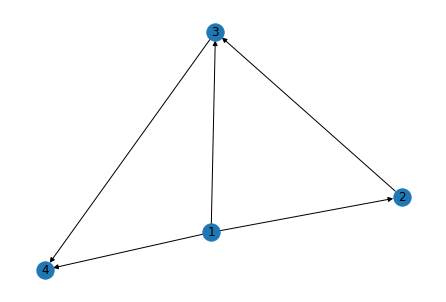

In [10]:
# 가중치가 있는 방향성 네트워크

w = nx.DiGraph() 
w.add_nodes_from([1,2,3,4])
w.add_edge(1,2, weight = 3)
w.add_edge(2,3, weight = 1) 
w.add_edge(1,3, weight = 5)
w.add_edge(1,4, weight = 4)
w.add_edge(3,4, weight = 2)
nx.draw(w, with_labels = True )
nx.degree_assortativity_coefficient(w) # 동류성 계수

In [11]:
nx.has_path(w,3,4)

True

In [12]:
print(nx.shortest_path_length(w,2,4))
print(nx.shortest_path_length(w,2,4,'weight'))

2
3


In [13]:
nx.average_shortest_path_length(w) 

0.5833333333333334

-1.0


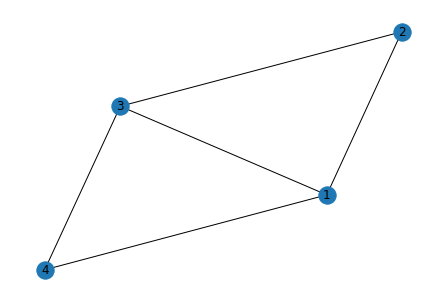

In [14]:
import scipy.stats

nx.draw(g, with_labels = True)
knn_dict = nx.average_degree_connectivity(g)
k,knn = list(knn_dict.keys()), list(knn_dict.values())
r, p_value = scipy.stats.pearsonr(k,knn)
print(r)

1.0


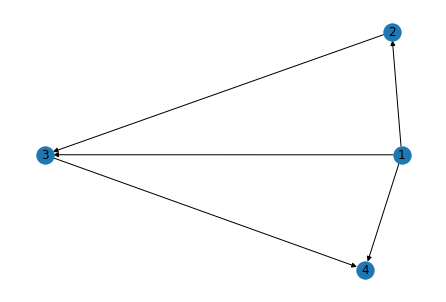

In [15]:
nx.draw(w, with_labels = True)
knn_dict = nx.average_degree_connectivity(w)
k,knn = list(knn_dict.keys()), list(knn_dict.values())
r, p_value = scipy.stats.pearsonr(k,knn)
print(r)

1.0

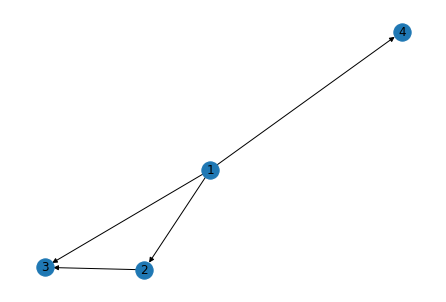

In [16]:
# 가중치가 있는 방향성 네트워크

f = nx.DiGraph() 
f.add_nodes_from([1,2,3,4])
f.add_edge(1,2, weight = 3)
f.add_edge(2,3, weight = 1) 
f.add_edge(1,3, weight = 5)
f.add_edge(1,4, weight = 4)
nx.draw(f, with_labels = True)
nx.average_shortest_path_length(f,'weight')

### 연결상태와 덩어리

In [17]:
k4 = nx.complete_graph(4)
print(nx.is_connected(k4))

True


False

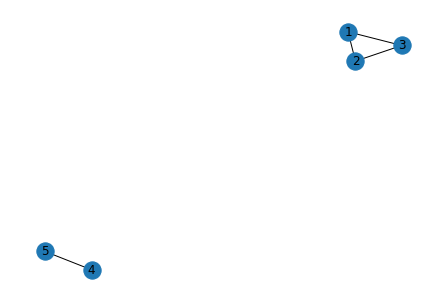

In [18]:
g = nx.Graph()

nx.add_cycle(g,[1,2,3])
g.add_edge(4,5)

nx.draw(g, with_labels = True)
nx.is_connected(g)

In [19]:
comps = sorted(nx.connected_components(g),key=len, reverse=True)
nodes_in_giant_comp = comps[0]
gc = nx.subgraph(g, nodes_in_giant_comp)
nx.is_connected(gc)

True

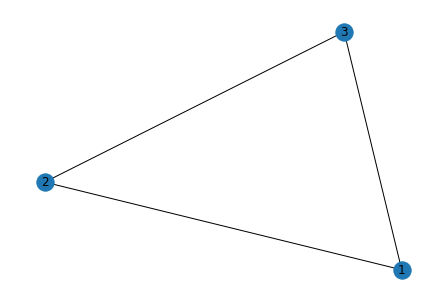

In [20]:
core_nodes = max(nx.connected_components(g), key = len)
core = g.subgraph(core_nodes)

nx.draw(core, with_labels = True)

### Directed paths & components

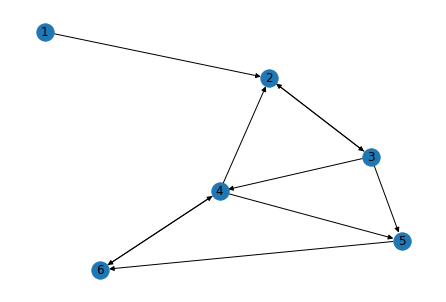

In [21]:
d = nx.DiGraph()
d.add_edges_from([
    (1,2),
    (2,3),
    (3,2),(3,4),(3,5),
    (4,2),(4,5),(4,6),
    (5,6),
    (6,4)
    ])

nx.draw(d, with_labels = True)

In [22]:
nx.has_path(d,1,4)

True

In [23]:
nx.has_path(d,4,1)

False

In [24]:
nx.shortest_path(d)

{1: {1: [1],
  2: [1, 2],
  3: [1, 2, 3],
  4: [1, 2, 3, 4],
  5: [1, 2, 3, 5],
  6: [1, 2, 3, 4, 6]},
 2: {2: [2], 3: [2, 3], 4: [2, 3, 4], 5: [2, 3, 5], 6: [2, 3, 4, 6]},
 3: {3: [3], 2: [3, 2], 4: [3, 4], 5: [3, 5], 6: [3, 4, 6]},
 4: {4: [4], 2: [4, 2], 5: [4, 5], 6: [4, 6], 3: [4, 2, 3]},
 5: {5: [5], 6: [5, 6], 4: [5, 6, 4], 2: [5, 6, 4, 2], 3: [5, 6, 4, 2, 3]},
 6: {6: [6], 4: [6, 4], 2: [6, 4, 2], 5: [6, 4, 5], 3: [6, 4, 2, 3]}}

In [25]:
nx.is_strongly_connected(d)

False

In [26]:
nx.is_weakly_connected(d)

True

In [27]:
list(nx.weakly_connected_components(d))

[{1, 2, 3, 4, 5, 6}]

In [28]:
list(nx.strongly_connected_components(d))

[{2, 3, 4, 5, 6}, {1}]

### 트리 tree

In [29]:
k4 = nx.complete_graph(4)
nx.is_tree(k4)

False

In [30]:
p = nx.path_graph(4)
nx.is_tree(p)

True

### 삼각구조

In [31]:
nx.triangles(g) # 노드의 딕셔너리 -> 삼각구조 개수  

{1: 1, 2: 1, 3: 1, 4: 0, 5: 0}

In [32]:
nx.clustering(g) # 노드의 딕셔너리 -> 뭉침 계수

{1: 1.0, 2: 1.0, 3: 1.0, 4: 0, 5: 0}

In [33]:
nx.average_clustering(g) # 네트워크의 뭉침 계수

0.6

## 연습문제 2강 15번

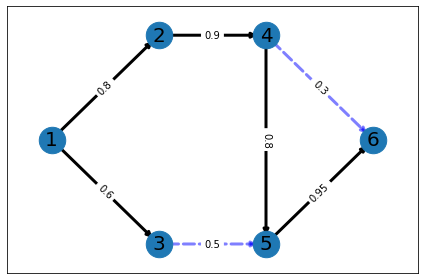

In [48]:
import matplotlib.pyplot as plt

d = nx.DiGraph()

d.add_nodes_from([1,2,3,4,5,6])

d.add_weighted_edges_from([(1,2,0.8),
                           (1,3,0.6),
                           (2,4,0.9),
                           (3,5,0.5),
                           (4,5,0.8),
                           (4,6,0.3),
                           (5,6,0.95)
                           ])

fixed_layout = {1:[0,0.5],
                2:[1,1],
                3:[1,0],
                4:[2,1],
                5:[2,0],
                6:[3,0.5]}
# 좌표 지정

large = [(u,v) for (u,v,d) in d.edges(data = True) if d['weight'] > 0.5]
small = [(u,v) for (u,v,d) in d.edges(data = True) if d['weight'] <= 0.5]

# node
nx.draw_networkx_nodes(d, pos = fixed_layout, node_size=700)

# edge
nx.draw_networkx_edges(d, pos = fixed_layout, edgelist = large, width = 3)
nx.draw_networkx_edges(d, pos = fixed_layout, edgelist = small, width = 3,
                       style = "dashed", alpha = 0.5, edge_color="b")

# node labels
nx.draw_networkx_labels(d, pos = fixed_layout, font_size = 20)

# edge weight labels
edge_labels = nx.get_edge_attributes(d, 'weight')
nx.draw_networkx_edge_labels(d, pos = fixed_layout, edge_labels=edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.tight_layout()
plt.show()

In [49]:
nx.is_weakly_connected(d)

True

In [50]:
print(nx.shortest_path(d,1,6))
nx.shortest_path_length(d,1,6, weight='weight')

[1, 2, 4, 6]


2.0

## 연습문제 2강 41번

In [37]:
G = nx.read_edgelist('socfb-Northwestern25.edges.gz')

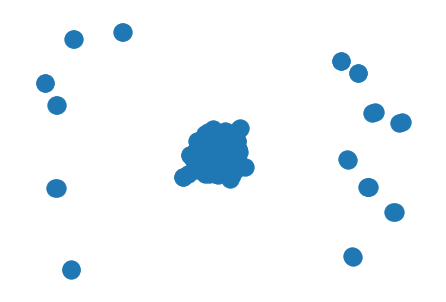

In [38]:
nx.draw(G)

In [39]:
G.number_of_edges()

488337

In [40]:
G.number_of_nodes()

10567

In [41]:
nx.is_connected(G) # 연결 상태 확인

False

In [42]:
len(list(nx.degree(G)))

10567

In [43]:
nx.density(G) # 조밀도

0.008747567709293077

In [45]:
a = []

for i in range(len(G.degree())):
  a.append(list(G.degree())[i][1])
print(sum(a))

976674


In [46]:
nx.degree_assortativity_coefficient(G) # 동류성 계수

0.03444129080711028

In [53]:
import scipy.stats
knn_dict = nx.k_nearest_neighbors(G)
k, knn = list(knn_dict.keys()), list(knn_dict.values())
r, p_value = scipy.stats.pearsonr(k,knn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  


In [55]:
print(r, p_value)

0.3618599341103246 1.9367205873909175e-14


In [47]:
nx.average_clustering(G) # 뭉침 계수

0.2379913948280604